In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm
from PIL import Image
from tensorflow.keras.utils import to_categorical
import matplotlib.image as img
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train = pd.read_csv("C:/Users/aryan/Desktop/Human Action Recognition/Training_set.csv")
test = pd.read_csv("C:/Users/aryan/Desktop/Human Action Recognition/Testing_set.csv")

# Load the image file paths
train_img = glob.glob("C:/Users/aryan/Desktop/Human Action Recognition/train/*")
test_img = glob.glob("C:/Users/aryan/Desktop/Human Action Recognition/test/*")

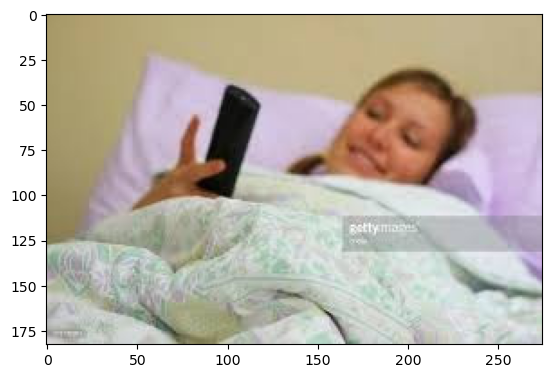

In [ ]:
x = plt.imread(train_img[41])
plt.imshow(x)

In [ ]:
images =train['filename']
labels = train['label']

In [ ]:
images[4]

'Image_5.jpg'

In [ ]:
Imm = []
lbl = []

for i in range(12600):
    I = "C:/Users/aryan/Desktop/Human Action Recognition/train/"+images[i]
    #I = images[i]
    p = Image.open(I)
    Imm.append(np.asarray(p.resize((160,160))))
    lbl.append(labels[i])

In [ ]:
Im = np.asarray(Imm)
type(Im)

lbll = to_categorical(np.asarray(labels.factorize()[0]))
lbll[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
len(Imm)

12600

In [ ]:
efficient_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top = False, input_shape = (160,160,3), pooling = 'avg', classes = 15, weights = 'imagenet')

for layer in model.layers:
    layer.trainable = False

efficient_model.add(model)
efficient_model.add(Flatten())
efficient_model.add(Dense(512, activation = "relu"))
efficient_model.add(Dense(15, activation = "softmax"))

In [ ]:
efficient_model.fit(Im, lbll, epochs = 20)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1946s 5s/step - accuracy: 0.5238 - loss: 1.5026
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1787s 5s/step - accuracy: 0.7068 - loss: 0.9100
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1747s 4s/step - accuracy: 0.7725 - loss: 0.7077
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1692s 4s/step - accuracy: 0.8316 - loss: 0.5329
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1686s 4s/step - accuracy: 0.8723 - loss: 0.3853
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1658s 4s/step - accuracy: 0.9185 - loss: 0.2702
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1633s 4s/step - accuracy: 0.9389 - loss: 0.2033
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1614s 4s/step - accuracy: 0.9505 - loss: 0.1636
Epoch 9/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1591s 4s/step - accuracy: 0.9681 - loss: 0.1157
Epoch 10/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1553s 4s/step - accuracy: 0.9656 - loss: 0.1148
Epoch 11/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 1545s 4s/step - accuracy: 0.9692 - loss: 0.1012
Epoch 12/20
394/394 ━━━━━━━━━━

In [ ]:
# Save the model to the specified location
efficient_model.save('C:/Users/aryan/Desktop/Human Action Recognition/my_model.keras')


In [ ]:
# Save the model to the specified location
efficient_model.save('C:/Users/aryan/Desktop/Human Action Recognition/saving.keras')


In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def read_image(photo):
    ph = Image.open(photo)
    ph = ph.resize((160, 160), Image.Resampling.NEAREST)  # Use a resampling filter
    ph = np.asarray(ph)
    return ph

# Function to test the model with a given image
def test(photo):
    # Load the saved model
    loaded_model = load_model('C:/Users/aryan/Desktop/Human Action Recognition/saving.keras') # Load the model here

    image = read_image(photo)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    result = loaded_model.predict(image)
    result1 = np.where(result == np.max(result))
    prediction = result1[1][0]
    print("Probability is:", np.max(result) * 100, "Predicted class is:", prediction)

# Example usage
test("C:/Users/aryan/Desktop/Human Action Recognition/test/Image_14.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Probability is: 98.49634766578674 Predicted class is: 0


In [ ]:
loaded_model = load_model('C:/Users/aryan/Desktop/Human Action Recognition/my_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Probability is: 99.99978542327881 Predicted class is: 4


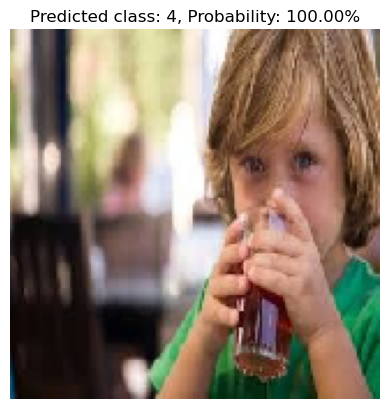

In [ ]:
# Function to read and preprocess the image
def read_image(photo):
    ph = Image.open(photo)
    ph = ph.resize((160, 160), Image.Resampling.NEAREST)  # Use a resampling filter
    ph = np.asarray(ph)
    return ph

# Function to test the model with a given image and display the image with the predicted class
def test(photo):
    image = read_image(photo)
    image_batch = np.expand_dims(image, axis=0)  # Add batch dimension
    result = loaded_model.predict(image_batch)
    result1 = np.where(result == np.max(result))
    prediction = result1[1][0]
    probability = np.max(result) * 100
    print("Probability is:", probability, "Predicted class is:", prediction)

    # Plot the image with the predicted class
    plt.imshow(image)
    plt.title(f"Predicted class: {prediction}, Probability: {probability:.2f}%")
    plt.axis('off')
    plt.show()

# Example usage
test("C:/Users/aryan/Desktop/Human Action Recognition/test/Image_10.jpg")

In [ ]:
import pandas as pd

# Load the training set
train_df = pd.read_csv('C:/Users/aryan/Desktop/Human Action Recognition/Training_set.csv')

# Assuming the class labels are in a column named 'label'
class_names = train_df['label'].unique()

# Print the class names and their count
print(f"Class names: {class_names}")
print(f"Number of classes: {len(class_names)}")


Class names: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping'
 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting'
 'listening_to_music' 'running' 'texting']
Number of classes: 15
